# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 0.3 * x

In [5]:
y_act = 5 + 0.3 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,0.562497,6.153118,5.168749
1,2.438849,4.087198,5.731655
2,4.632719,5.851220,6.389816
3,5.595173,6.485871,6.678552
4,-0.349469,4.768713,4.895159


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

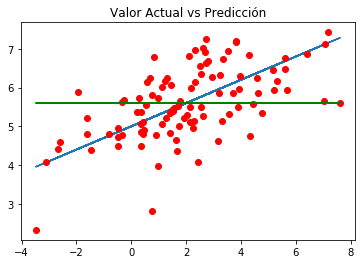

In [11]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Como es que funciona la predicción en el fondo?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [12]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,0.562497,6.153118,5.168749,0.188103,0.968982,0.303226
1,2.438849,4.087198,5.731655,0.016692,2.704236,2.296011
2,4.632719,5.851220,6.389816,0.619932,0.290085,0.061883
3,5.595173,6.485871,6.678552,1.157978,0.037126,0.780418
4,-0.349469,4.768713,4.895159,0.500271,0.015989,0.695131


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [15]:
SSR

46.34997884028764

In [16]:
SSD

59.45982805843876

In [17]:
SST

85.78494811464283

In [18]:
SSR+SSD

105.8098068987264

In [19]:
R2 = SSR/SST

In [20]:
R2

0.5403043291271287

(array([ 6., 12., 14., 18., 24., 14.,  4.,  4.,  3.,  1.]),
 array([-1.5528419 , -1.15585083, -0.75885977, -0.3618687 ,  0.03512237,
         0.43211343,  0.8291045 ,  1.22609557,  1.62308663,  2.0200777 ,
         2.41706877]),
 <a list of 10 Patch objects>)

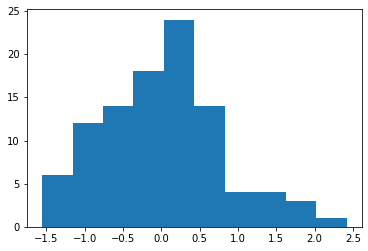

In [21]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [22]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(2.0426549272245658, 5.60245792400857)

In [23]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [24]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [25]:
alpha = y_mean - beta * x_mean

In [26]:
alpha, beta

(5.121925697525678, 0.2352488519124521)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

In [27]:
data["y_model"] = alpha + beta * data["x"]

In [28]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,0.562497,6.153118,5.168749,0.188103,0.968982,0.303226,-0.815064,2.190867,5.254253
1,2.438849,4.087198,5.731655,0.016692,2.704236,2.296011,-0.600337,0.156970,5.695662
2,4.632719,5.851220,6.389816,0.619932,0.290085,0.061883,0.644310,6.708430,6.211767
3,5.595173,6.485871,6.678552,1.157978,0.037126,0.780418,3.138340,12.620386,6.438184
4,-0.349469,4.768713,4.895159,0.500271,0.015989,0.695131,1.994422,5.722255,5.039714


In [29]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [30]:
SSR, SSD, SST

(28.494555963372658, 57.29039215127019, 85.78494811464283)

In [31]:
R2 = SSR / SST
R2

0.3321626531182672

Text(0.5, 1.0, 'Valor Actual vs Predicción')

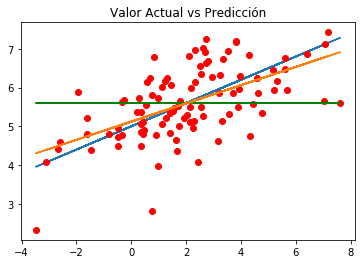

In [32]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [33]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7645886726065638

In [34]:
np.mean(data["y_actual"])

5.60245792400857

In [35]:
RSE / np.mean(data["y_actual"])

0.13647379114263816